In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import warnings
warnings.simplefilter("ignore", UserWarning)

# 1.Масштабирование признаков

In [19]:
dataset = pd.read_csv('/content/Apple Dataset.csv')
dataset.head()
X=dataset.drop('Date',axis=1)
y=dataset['Date']
X_train,X_test,y_train,y_test=train_test_split(X,y)
X_train=X_train.drop(['Close'],axis=1)
X_test=X_test.drop(['Close'],axis=1)
X_train

,Open,High,Low,Adj Close,Volume
2898,0.511161,0.531250,0.500000,0.416033,248046400
5058,0.260045,0.262277,0.250000,0.212307,513945600
1345,0.121094,0.122210,0.119978,0.093890,109984000
6507,2.636071,2.709286,2.632857,2.287251,858992400
6368,2.367500,2.400000,2.333929,1.982587,653251200
...,...,...,...,...,...
3908,0.234375,0.234375,0.220982,0.187773,219520000
7841,15.095714,15.101786,14.975357,12.758789,215084800
8157,15.009643,15.021429,14.218214,12.341960,945056000
805,0.113281,0.116071,0.111607,0.086137,134646400


In [9]:
def arr_df(a):
    df = pd.DataFrame(a, columns=X_train.columns)
    return df
scaler1 = StandardScaler()
scaled_X_1 = arr_df(scaler1.fit_transform(X_train))
scaled_X_1

,Open,High,Low,Adj Close,Volume
0,0.337430,0.335349,0.337966,0.298647,-0.660500
1,-0.467443,-0.467577,-0.467500,-0.456911,-0.183579
2,-0.472395,-0.472309,-0.472249,-0.460149,0.157891
3,-0.475215,-0.475194,-0.475021,-0.462833,-0.478233
4,0.272519,0.273723,0.279046,0.249404,-0.559373
...,...,...,...,...,...
8210,-0.402232,-0.402714,-0.402379,-0.400381,2.964490
8211,-0.342069,-0.342369,-0.340772,-0.349099,0.012463
8212,-0.468634,-0.468623,-0.468616,-0.457153,-0.179364
8213,-0.469251,-0.469341,-0.469073,-0.457978,-0.589765


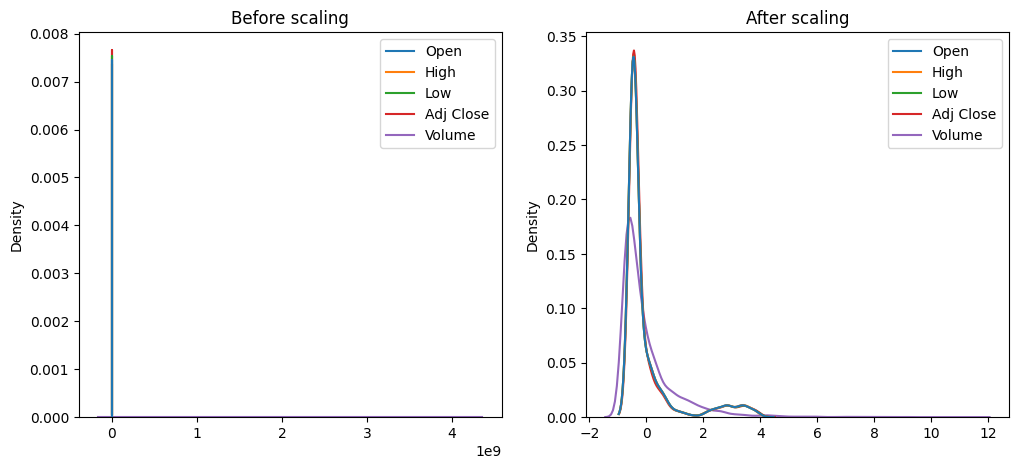

In [10]:
def data_visualize(columns, df1, df2, label1, label2):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
  ax1.set_title(label1)
  sns.kdeplot(data=df1[columns], ax=ax1)
  ax2.set_title(label2)
  sns.kdeplot(data=df2[columns], ax=ax2)
  plt.show()

data_visualize(X_train.columns, X_train, scaled_X_1, 'Before scaling', 'After scaling')

Mетод MinMaxScaler

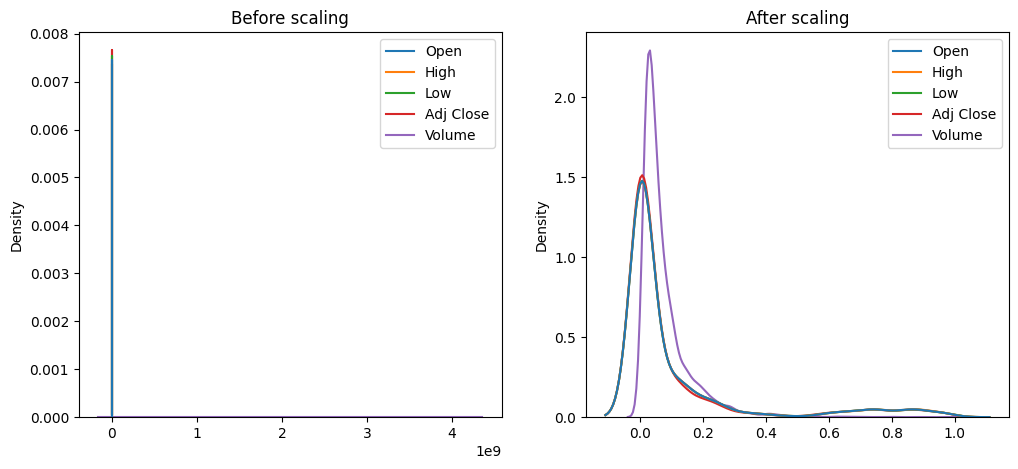

In [11]:
scaler2 = MinMaxScaler()
scaled_X_2 = arr_df(scaler2.fit_transform(X_train))
data_visualize(X_train.columns, X_train, scaled_X_2, 'Before scaling', 'After scaling')

Метод RobustScaler

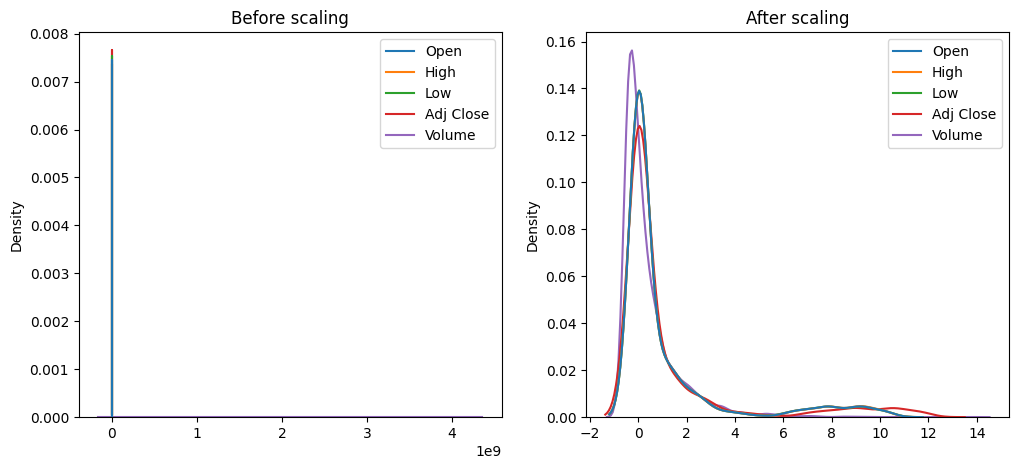

In [13]:
scaler3 = RobustScaler()
scaled_X_3 = arr_df(scaler3.fit_transform(X_train))
data_visualize(X_train.columns, X_train, scaled_X_3, 'Before scaling', 'After scaling')

# 2.Обработка выбросов для числовых признаков

In [14]:
def plot_for_analys(df, variable, title):
    fig, ax = plt.subplots(figsize=(15,7))
    plt.subplot(1, 2, 1)
    sns.violinplot(x=df[variable])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[variable])
    fig.suptitle(title)
    plt.show()

<ipython-input-14-36cb798f7093>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


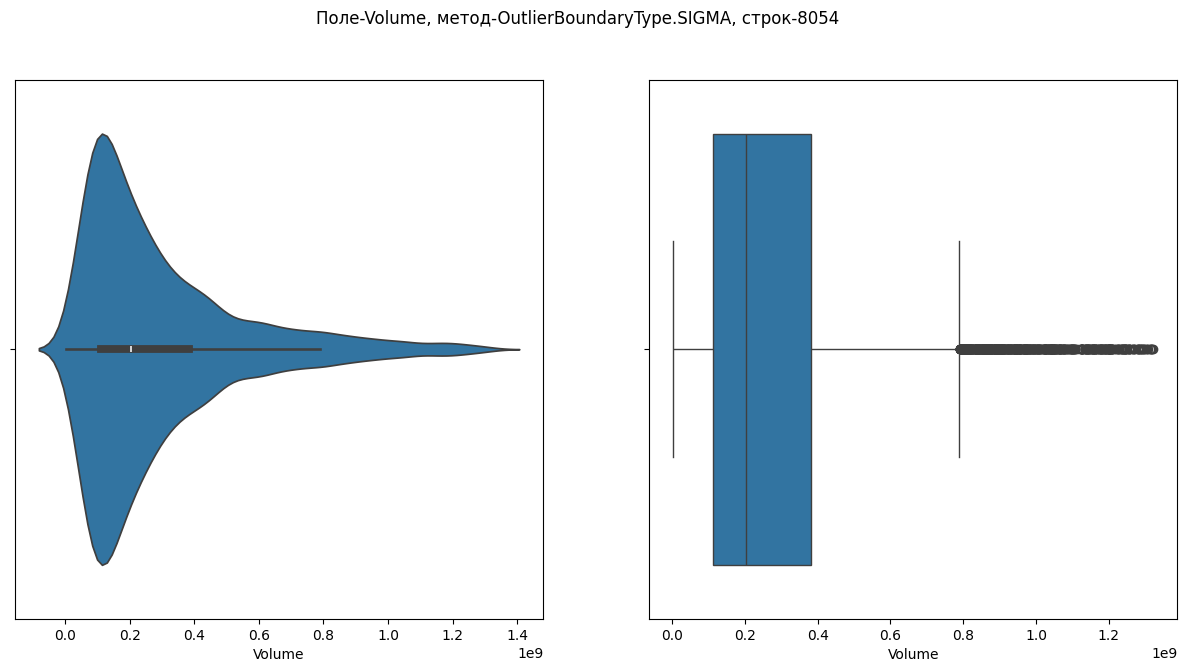

In [15]:
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    else:
        raise NameError('Unknown Outlier Boundary Type')

    return lower_boundary, upper_boundary
x_col_list = ['Volume']
data=X_train
for col in x_col_list:
    for obt in OutlierBoundaryType:
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True,
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        plot_for_analys(data_trimmed, col, title)

# 3.Отбор признаков

In [39]:
dataset = pd.read_csv('/content/Apple Dataset.csv')
dataset.head()
X=dataset.drop('Date',axis=1)
df = pd.DataFrame(X)

# 设置方差阈值
threshold = 3000

# 初始化VarianceThreshold对象，并指定阈值
selector = VarianceThreshold(threshold)
selected_features = selector.fit_transform(df)
selected_column_indices = selector.get_support(indices=True)

# 获取保留下来的特征列名称
selected_columns = df.columns[selected_column_indices]
print("Selected Features:")
print(selected_columns)

Selected Features:
Index(['Volume'], dtype='object')


In [35]:
data=df.drop(['Volume'],axis=1)
data

,Open,High,Low,Close,Adj Close
0,0.128348,0.128906,0.128348,0.128348,0.099058
1,0.122210,0.122210,0.121652,0.121652,0.093890
2,0.113281,0.113281,0.112723,0.112723,0.086999
3,0.115513,0.116071,0.115513,0.115513,0.089152
4,0.118862,0.119420,0.118862,0.118862,0.091737
...,...,...,...,...,...
10949,189.330002,191.919998,189.009995,191.039993,191.039993
10950,191.089996,192.729996,190.919998,192.350006,192.350006
10951,192.270004,192.820007,190.270004,190.899994,190.899994
10952,190.979996,191.000000,186.630005,186.880005,186.880005


In [41]:
#Recursive Feature Elimination，RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd
# 将特征列和目标列分开
X = df.drop('Adj Close', axis=1)
y = df['Adj Close']

# 初始化线性回归模型
model = LinearRegression()

# 初始化RFE对象，指定要保留的特征数量
rfe = RFE(estimator=model, n_features_to_select=3)
selected_features = rfe.fit_transform(X, y)
selected_column_indices = rfe.get_support(indices=True)

# 获取保留下来的特征列名称
selected_columns = X.columns[selected_column_indices]
print("Selected Features:")
print(selected_columns)

Selected Features:
Index(['Open', 'Low', 'Close'], dtype='object')


In [42]:
data=df.drop(['Open', 'Low', 'Close'],axis=1)
data

,High,Adj Close,Volume
0,0.128906,0.099058,469033600
1,0.122210,0.093890,175884800
2,0.113281,0.086999,105728000
3,0.116071,0.089152,86441600
4,0.119420,0.091737,73449600
...,...,...,...
10949,191.919998,191.039993,44361300
10950,192.729996,192.350006,42309400
10951,192.820007,190.899994,34648500
10952,191.000000,186.880005,51005900


Метод из группы методов вложений

In [45]:
from sklearn.linear_model import Lasso
dataset = pd.read_csv('/content/Apple Dataset.csv')
dataset.head()
X=dataset.drop('Date',axis=1)
y=dataset['Open']
X_train,X_test,y_train,y_test=train_test_split(X,y)
X_train=X_train.drop(['Close'],axis=1)
X_test=X_test.drop(['Close'],axis=1)
# Используем L1-регуляризацию
e_ls1 = Lasso(random_state=1)
e_ls1.fit(X_train, y_train)
# Коэффициенты регрессии
list(zip(X_train.columns, e_ls1.coef_))

[('Open', 0.9994610287218619),
 ('High', 1.0474075642889315e-05),
 ('Low', 0.0),
 ('Adj Close', 0.0),
 ('Volume', -1.8052049707562595e-11)]

In [46]:
from sklearn.feature_selection import SelectFromModel
sel_e_ls1 = SelectFromModel(e_ls1)
sel_e_ls1.fit(X_train, y_train)
list(zip(X_train.columns, sel_e_ls1.get_support()))

[('Open', True),
 ('High', True),
 ('Low', False),
 ('Adj Close', False),
 ('Volume', False)]